## Data Harmonization and Insights Extraction project2

## Importing all libraries reqirued:

In [1086]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

## loading data1 in python file using pandas:

In [1088]:
df1 = pd.read_csv(r"d:\Users\Admin\Downloads\dataset_1.csv" )

In [1089]:
df1.shape

(610, 10)

In [1090]:
df1.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
5,6,01-01-2011,1,0,1,5,False,6,2,0.24


In [1091]:
df1['holiday'] = df1['weekday'].apply(lambda x: True if x == 0 or x == 6 else df1['holiday'][x])
print(df1)

     instant      dteday  season  yr  mnth  hr  holiday  weekday  weathersit  \
0          1  01-01-2011       1   0     1   0     True        6           1   
1          2  01-01-2011       1   0     1   1     True        6           1   
2          3  01-01-2011       1   0     1   2     True        6           1   
3          4  01-01-2011       1   0     1   3     True        6           1   
4          5  01-01-2011       1   0     1   4     True        6           1   
..       ...         ...     ...  ..   ...  ..      ...      ...         ...   
605      606  28-01-2011       1   0     1  11    False        5           3   
606      607  28-01-2011       1   0     1  12    False        5           3   
607      608  28-01-2011       1   0     1  13    False        5           3   
608      609  28-01-2011       1   0     1  14    False        5           3   
609      610  28-01-2011       1   0     1  15    False        5           2   

     temp  
0    0.24  
1    0.22  
2  

In [1092]:
df1.rename(columns={
    'instant': 'Ride_id',
    'dteday': 'Date',
    'yr' : 'Year',
    'mnth' :'Month',
    'hr' :'Hour',
     'holiday' :'Holiday',
    'season': 'Season_type',
    'weekday': 'Weekday',
    'weathersit': 'Weather',
    'temp': 'Temperature',
}, inplace=True)
df1['Weather'] = df1['Weather'].replace({1:'Clear, Partly cloudy', 2:'Misty, Cloudy',3:'Light Rain,Thunderstorm',
                                       4: 'Heavy Rain, Ice Pallets'})
df1['Weekday'] = df1['Weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
print(df1)

     Ride_id        Date  Season_type  Year  Month  Hour  Holiday   Weekday  \
0          1  01-01-2011            1     0      1     0     True  Saturday   
1          2  01-01-2011            1     0      1     1     True  Saturday   
2          3  01-01-2011            1     0      1     2     True  Saturday   
3          4  01-01-2011            1     0      1     3     True  Saturday   
4          5  01-01-2011            1     0      1     4     True  Saturday   
..       ...         ...          ...   ...    ...   ...      ...       ...   
605      606  28-01-2011            1     0      1    11    False    Friday   
606      607  28-01-2011            1     0      1    12    False    Friday   
607      608  28-01-2011            1     0      1    13    False    Friday   
608      609  28-01-2011            1     0      1    14    False    Friday   
609      610  28-01-2011            1     0      1    15    False    Friday   

                     Weather  Temperature  
0      

In [1093]:
df1['Month'] = df1['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 
                 10: 'October', 11: 'November', 12: 'December'})
df1['Season_type'] = df1['Season_type'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
print(df1)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0          1  01-01-2011      Spring     0  January     0     True  Saturday   
1          2  01-01-2011      Spring     0  January     1     True  Saturday   
2          3  01-01-2011      Spring     0  January     2     True  Saturday   
3          4  01-01-2011      Spring     0  January     3     True  Saturday   
4          5  01-01-2011      Spring     0  January     4     True  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
605      606  28-01-2011      Spring     0  January    11    False    Friday   
606      607  28-01-2011      Spring     0  January    12    False    Friday   
607      608  28-01-2011      Spring     0  January    13    False    Friday   
608      609  28-01-2011      Spring     0  January    14    False    Friday   
609      610  28-01-2011      Spring     0  January    15    False    Friday   

                     Weather  Temperatu

In [1094]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ride_id      610 non-null    int64  
 1   Date         610 non-null    object 
 2   Season_type  610 non-null    object 
 3   Year         610 non-null    int64  
 4   Month        610 non-null    object 
 5   Hour         610 non-null    int64  
 6   Holiday      610 non-null    bool   
 7   Weekday      610 non-null    object 
 8   Weather      610 non-null    object 
 9   Temperature  610 non-null    float64
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 43.6+ KB


In [1095]:
Year_mapping = {0: 2011,1: 2012}
df1['Year'] = df1['Year'].map(Year_mapping)
print(df1)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0          1  01-01-2011      Spring  2011  January     0     True  Saturday   
1          2  01-01-2011      Spring  2011  January     1     True  Saturday   
2          3  01-01-2011      Spring  2011  January     2     True  Saturday   
3          4  01-01-2011      Spring  2011  January     3     True  Saturday   
4          5  01-01-2011      Spring  2011  January     4     True  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
605      606  28-01-2011      Spring  2011  January    11    False    Friday   
606      607  28-01-2011      Spring  2011  January    12    False    Friday   
607      608  28-01-2011      Spring  2011  January    13    False    Friday   
608      609  28-01-2011      Spring  2011  January    14    False    Friday   
609      610  28-01-2011      Spring  2011  January    15    False    Friday   

                     Weather  Temperatu

### After preprocessing data1 importing data into CSV file:

In [1097]:
from IPython.display import FileLink

df1.to_csv('preprocessed_data.csv', index=False)
FileLink('preprocessed_data.csv')

C:\Users\Admin\NEXTHIKES PROJECT\preprocessed_data.csv

## loading data2 in python file using pandas:

In [1099]:
df2 = pd.read_csv(r"d:\Users\Admin\Downloads\dataset_2.csv" )

In [1100]:
df2.shape

(610, 8)

In [1101]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [1102]:
df2.rename(columns={
    'instant': 'Ride_id',
    'atemp': 'ATemperature',
    'hum': 'Relative humidity',
    'windspeed': 'Windspeed',
    'casual' :'Non-registered rentals',
    'registered': 'Registered rentals',
    'cnt': 'Total rentals',
}, inplace=True)
print(df2)

     Ride_id  ATemperature  Relative humidity  Windspeed  \
0          1        0.2879               0.81     0.0000   
1          2        0.2727               0.80     0.0000   
2          3        0.2727               0.80     0.0000   
3          4        0.2879               0.75     0.0000   
4          5        0.2879               0.75     0.0000   
..       ...           ...                ...        ...   
605      606        0.2121               0.93     0.1045   
606      607        0.2121               0.93     0.1045   
607      608        0.2121               0.93     0.1045   
608      609        0.2727               0.80     0.0000   
609      610        0.2576               0.86     0.0000   

     Non-registered rentals  Registered rentals  Total rentals  
0                         3                  13             16  
1                         8                  32             40  
2                         5                  27             32  
3                  

In [1103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ride_id                 610 non-null    int64  
 1   ATemperature            599 non-null    float64
 2   Relative humidity       610 non-null    float64
 3   Windspeed               610 non-null    float64
 4   Non-registered rentals  610 non-null    int64  
 5   Registered rentals      610 non-null    int64  
 6   Total rentals           610 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 33.5 KB


In [1104]:
print("Missing values before handling:")
print(df2.isnull().sum())

Missing values before handling:
Ride_id                    0
ATemperature              11
Relative humidity          0
Windspeed                  0
Non-registered rentals     0
Registered rentals         0
Total rentals              0
dtype: int64


In [1105]:
l = df2["ATemperature"].median()
l

0.197

In [1106]:
df2["ATemperature"] = df2["ATemperature"].replace(np.nan,0.197)
df2

,Ride_id,ATemperature,Relative humidity,Windspeed,Non-registered rentals,Registered rentals,Total rentals
0,1,0.2879,0.81,0.0000,3,13,16
1,2,0.2727,0.80,0.0000,8,32,40
2,3,0.2727,0.80,0.0000,5,27,32
3,4,0.2879,0.75,0.0000,3,10,13
4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...
605,606,0.2121,0.93,0.1045,0,30,30
606,607,0.2121,0.93,0.1045,1,28,29
607,608,0.2121,0.93,0.1045,0,31,31
608,609,0.2727,0.80,0.0000,2,36,38


In [1107]:
print(df2.isnull().sum())

Ride_id                   0
ATemperature              0
Relative humidity         0
Windspeed                 0
Non-registered rentals    0
Registered rentals        0
Total rentals             0
dtype: int64


### After preprocessing data2 importing data into CSV file:

In [1109]:
from IPython.display import FileLink
df2.to_csv('preprocessed_data.csv', index=False)
FileLink('preprocessed_data.csv')

C:\Users\Admin\NEXTHIKES PROJECT\preprocessed_data.csv

## Mergering dataset1 and dataset2:

In [1111]:
df1 = pd.read_csv(r"d:\Users\Admin\Downloads\preprocessed_data1.csv")

In [1112]:
df2 = pd.read_csv(r"d:\Users\Admin\Downloads\preprocessed_data2.csv")

In [1113]:
# Concatenate the two DataFrames along the columns
merged_df1 = pd.merge(df1,df2,on='Ride_id',how ='inner')

In [1114]:
# Display the merged DataFrame
print(merged_df1)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0          1  01-01-2011      Spring  2011  January     0     True  Saturday   
1          2  01-01-2011      Spring  2011  January     1     True  Saturday   
2          3  01-01-2011      Spring  2011  January     2     True  Saturday   
3          4  01-01-2011      Spring  2011  January     3     True  Saturday   
4          5  01-01-2011      Spring  2011  January     4     True  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
605      606  28-01-2011      Spring  2011  January    11    False    Friday   
606      607  28-01-2011      Spring  2011  January    12    False    Friday   
607      608  28-01-2011      Spring  2011  January    13    False    Friday   
608      609  28-01-2011      Spring  2011  January    14    False    Friday   
609      610  28-01-2011      Spring  2011  January    15    False    Friday   

                     Weather  Temperatu

In [1115]:
print(f"Merged DataFrame shape: {merged_df1.shape}")

Merged DataFrame shape: (610, 16)


In [1116]:
print(f"Duplicate rows: {merged_df1.duplicated().sum()}")

Duplicate rows: 0


In [1117]:
print(f"Missing values: {merged_df1.isnull().sum().sum()}")

Missing values: 0


In [1118]:
print(f"Unique 'Ride_id' values: {merged_df1['Ride_id'].nunique()}")

Unique 'Ride_id' values: 610


In [1119]:
print("Columns in merged data:")
print(merged_df1.columns)

Columns in merged data:
Index(['Ride_id', 'Date', 'Season_type', 'Year', 'Month', 'Hour', 'Holiday',
       'Weekday', 'Weather', 'Temperature', 'ATemperature',
       'Relative humidity', 'Windspeed', 'Non-registered rentals',
       'Registered rentals', 'Total rentals'],
      dtype='object')


In [1120]:
print(merged_df1.isnull().sum())

Ride_id                   0
Date                      0
Season_type               0
Year                      0
Month                     0
Hour                      0
Holiday                   0
Weekday                   0
Weather                   0
Temperature               0
ATemperature              0
Relative humidity         0
Windspeed                 0
Non-registered rentals    0
Registered rentals        0
Total rentals             0
dtype: int64


### After preprocessing data1+data2 importing merge data into CSV file:

In [1122]:
merged_df1
from IPython.display import FileLink
merged_df1.to_csv('merged_df1.csv', index=False)
FileLink('merged_df1.csv')

C:\Users\Admin\NEXTHIKES PROJECT\merged_df1.csv

In [1123]:
df3 = pd.read_csv(r"d:\Users\Admin\Downloads\dataset3.csv")

In [1124]:
df3.rename(columns={
    'instant': 'Ride_id',
    'dteday': 'Date',
    'yr' : 'Year',
    'mnth' :'Month',
    'hr' :'Hour',
    'holiday':'Holiday',
    'windspeed':'Windspeed',
    'season': 'Season_type',
    'weathersit': 'Weather',
     'weekday': 'Weekday',
    'temp': 'Temperature',
    'atemp': 'ATemperature',
    'instant': 'Ride_id',
    'hum': 'Relative humidity',
    'casual' :'Non-registered rentals',
    'registered': 'Registered rentals',
    'cnt': 'Total rentals',
}, inplace=True)
df3['Weather'] = df3['Weather'].replace({1:'Clear, Partly cloudy', 2:'Misty, Cloudy',3:'Light Rain,Thunderstorm',
                                       4: 'Heavy Rain, Ice Pallets'})
df3['Weekday'] = df3['Weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
print(df3)

     Ride_id        Date  Season_type  Year  Month  Hour  Holiday   Weekday  \
0        620  29-01-2011            1     0      1     1    False  Saturday   
1        621  29-01-2011            1     0      1     2    False  Saturday   
2        622  29-01-2011            1     0      1     3    False  Saturday   
3        623  29-01-2011            1     0      1     4    False  Saturday   
4        624  29-01-2011            1     0      1     6    False  Saturday   
..       ...         ...          ...   ...    ...   ...      ...       ...   
385      615  28-01-2011            1     0      1    20    False    Friday   
386      616  28-01-2011            1     0      1    21    False    Friday   
387      617  28-01-2011            1     0      1    22    False    Friday   
388      618  28-01-2011            1     0      1    23    False    Friday   
389      619  29-01-2011            1     0      1     0    False  Saturday   

                  Weather  Temperature  ATemperatur

In [1125]:
df3['Month'] = df3['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 
                 10: 'October', 11: 'November', 12: 'December'})
df3['Season_type'] = df3['Season_type'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
print(df3)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0        620  29-01-2011      Spring     0  January     1    False  Saturday   
1        621  29-01-2011      Spring     0  January     2    False  Saturday   
2        622  29-01-2011      Spring     0  January     3    False  Saturday   
3        623  29-01-2011      Spring     0  January     4    False  Saturday   
4        624  29-01-2011      Spring     0  January     6    False  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
385      615  28-01-2011      Spring     0  January    20    False    Friday   
386      616  28-01-2011      Spring     0  January    21    False    Friday   
387      617  28-01-2011      Spring     0  January    22    False    Friday   
388      618  28-01-2011      Spring     0  January    23    False    Friday   
389      619  29-01-2011      Spring     0  January     0    False  Saturday   

                  Weather  Temperature 

In [1126]:
Year_mapping = {0: 2011,1: 2012}
df3['Year'] = df3['Year'].map(Year_mapping)
print(df3)

     Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0        620  29-01-2011      Spring  2011  January     1    False  Saturday   
1        621  29-01-2011      Spring  2011  January     2    False  Saturday   
2        622  29-01-2011      Spring  2011  January     3    False  Saturday   
3        623  29-01-2011      Spring  2011  January     4    False  Saturday   
4        624  29-01-2011      Spring  2011  January     6    False  Saturday   
..       ...         ...         ...   ...      ...   ...      ...       ...   
385      615  28-01-2011      Spring  2011  January    20    False    Friday   
386      616  28-01-2011      Spring  2011  January    21    False    Friday   
387      617  28-01-2011      Spring  2011  January    22    False    Friday   
388      618  28-01-2011      Spring  2011  January    23    False    Friday   
389      619  29-01-2011      Spring  2011  January     0    False  Saturday   

                  Weather  Temperature 

In [1127]:
# Sorting the DataFrame to ensure 'Ride_id' is in sequential order
df3_sorted_sequential = df3.sort_values(by='Ride_id').reset_index(drop=True)

# Checking for sequential order
is_sequential = df3_sorted_sequential['Ride_id'].is_monotonic_increasing

df3_sorted_sequential.head(),df3_sorted_sequential.tail(),is_sequential

(   Ride_id        Date Season_type  Year    Month  Hour  Holiday Weekday  \
 0      611  28-01-2011      Spring  2011  January    16    False  Friday   
 1      612  28-01-2011      Spring  2011  January    17    False  Friday   
 2      613  28-01-2011      Spring  2011  January    18    False  Friday   
 3      614  28-01-2011      Spring  2011  January    19    False  Friday   
 4      615  28-01-2011      Spring  2011  January    20    False  Friday   
 
                 Weather  Temperature  ATemperature  Relative humidity  \
 0  Clear, Partly cloudy         0.22        0.2727               0.80   
 1  Clear, Partly cloudy         0.24        0.2424               0.75   
 2  Clear, Partly cloudy         0.24        0.2273               0.75   
 3         Misty, Cloudy         0.24        0.2424               0.75   
 4         Misty, Cloudy         0.24        0.2273               0.70   
 
    Windspeed  Non-registered rentals  Registered rentals  Total rentals  
 0     0.0000  

### After preprocessing data3 importing data into CSV file:

In [1129]:
from IPython.display import FileLink
df3.to_csv('df3.csv', index=False)
FileLink('df3.csv')

C:\Users\Admin\NEXTHIKES PROJECT\df3.csv

In [1130]:
merge_df1 = pd.read_csv(r"d:\Users\Admin\Downloads\merged_df1.csv")

In [1131]:
merge_df1.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ride_id                 610 non-null    int64  
 1   Date                    610 non-null    object 
 2   Season_type             610 non-null    object 
 3   Year                    610 non-null    int64  
 4   Month                   610 non-null    object 
 5   Hour                    610 non-null    int64  
 6   Holiday                 610 non-null    bool   
 7   Weekday                 610 non-null    object 
 8   Weather                 610 non-null    object 
 9   Temperature             610 non-null    float64
 10  ATemperature            610 non-null    float64
 11  Relative humidity       610 non-null    float64
 12  Windspeed               610 non-null    float64
 13  Non-registered rentals  610 non-null    int64  
 14  Registered rentals      610 non-null    in

In [1132]:
PreP_df3 = pd.read_csv(r"d:\Users\Admin\Downloads\preprocessed_data3.csv")

In [1133]:
PreP_df3.head(5),PreP_df3.tail(5)

(   Ride_id        Date Season_type  Year    Month  Hour  Holiday Weekday  \
 0      611  28-01-2011      Spring  2011  January    16    False  Friday   
 1      612  28-01-2011      Spring  2011  January    17    False  Friday   
 2      613  28-01-2011      Spring  2011  January    18    False  Friday   
 3      614  28-01-2011      Spring  2011  January    19    False  Friday   
 4      615  28-01-2011      Spring  2011  January    20    False  Friday   
 
                 Weather  Temperature  ATemperature  Relative humidity  \
 0  Clear, Partly cloudy         0.22        0.2727               0.80   
 1  Clear, Partly cloudy         0.24        0.2424               0.75   
 2  Clear, Partly cloudy         0.24        0.2273               0.75   
 3         Misty, Cloudy         0.24        0.2424               0.75   
 4         Misty, Cloudy         0.24        0.2273               0.70   
 
    Windspeed  Non-registered rentals  Registered rentals  Total rentals  
 0     0.0000  

## merging merge_df1 & preprocessed data3 in python file using pandas:

In [1135]:
merge_df1 = pd.read_csv(r"d:\Users\Admin\Downloads\merged_df1.csv")
PreP_df3 = pd.read_csv(r"d:\Users\Admin\Downloads\preprocessed_data3.csv")
merged_df2 =pd.concat([merge_df1,PreP_df3], ignore_index=True)

In [1136]:
print(merged_df2.head())
print(merged_df2.shape)


   Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0        1  01-01-2011      Spring  2011  January     0     True  Saturday   
1        2  01-01-2011      Spring  2011  January     1     True  Saturday   
2        3  01-01-2011      Spring  2011  January     2     True  Saturday   
3        4  01-01-2011      Spring  2011  January     3     True  Saturday   
4        5  01-01-2011      Spring  2011  January     4     True  Saturday   

                Weather  Temperature  ATemperature  Relative humidity  \
0  Clear, Partly cloudy         0.24        0.2879               0.81   
1  Clear, Partly cloudy         0.22        0.2727               0.80   
2  Clear, Partly cloudy         0.22        0.2727               0.80   
3  Clear, Partly cloudy         0.24        0.2879               0.75   
4  Clear, Partly cloudy         0.24        0.2879               0.75   

   Windspeed  Non-registered rentals  Registered rentals  Total rentals  
0        0.0      

In [1137]:
merged_df2.head(5),merged_df2.tail(5)

(   Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
 0        1  01-01-2011      Spring  2011  January     0     True  Saturday   
 1        2  01-01-2011      Spring  2011  January     1     True  Saturday   
 2        3  01-01-2011      Spring  2011  January     2     True  Saturday   
 3        4  01-01-2011      Spring  2011  January     3     True  Saturday   
 4        5  01-01-2011      Spring  2011  January     4     True  Saturday   
 
                 Weather  Temperature  ATemperature  Relative humidity  \
 0  Clear, Partly cloudy         0.24        0.2879               0.81   
 1  Clear, Partly cloudy         0.22        0.2727               0.80   
 2  Clear, Partly cloudy         0.22        0.2727               0.80   
 3  Clear, Partly cloudy         0.24        0.2879               0.75   
 4  Clear, Partly cloudy         0.24        0.2879               0.75   
 
    Windspeed  Non-registered rentals  Registered rentals  Total rentals  
 0 

In [1138]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ride_id                 1000 non-null   int64  
 1   Date                    1000 non-null   object 
 2   Season_type             1000 non-null   object 
 3   Year                    1000 non-null   int64  
 4   Month                   1000 non-null   object 
 5   Hour                    1000 non-null   int64  
 6   Holiday                 1000 non-null   bool   
 7   Weekday                 1000 non-null   object 
 8   Weather                 1000 non-null   object 
 9   Temperature             1000 non-null   float64
 10  ATemperature            1000 non-null   float64
 11  Relative humidity       1000 non-null   float64
 12  Windspeed               1000 non-null   float64
 13  Non-registered rentals  1000 non-null   int64  
 14  Registered rentals      1000 non-null   i

In [1139]:
print(merged_df2.isnull().sum())
print(merged_df2.shape)

Ride_id                   0
Date                      0
Season_type               0
Year                      0
Month                     0
Hour                      0
Holiday                   0
Weekday                   0
Weather                   0
Temperature               0
ATemperature              0
Relative humidity         0
Windspeed                 0
Non-registered rentals    0
Registered rentals        0
Total rentals             0
dtype: int64
(1000, 16)


In [1140]:
from IPython.display import FileLink
merged_df2.to_csv('merged_df2.csv', index=False)
FileLink('merged_df2.csv')

C:\Users\Admin\NEXTHIKES PROJECT\merged_df2.csv

In [1141]:
merged_df2.isnull().sum()/merged_df2.shape[0]*100

Ride_id                   0.0
Date                      0.0
Season_type               0.0
Year                      0.0
Month                     0.0
Hour                      0.0
Holiday                   0.0
Weekday                   0.0
Weather                   0.0
Temperature               0.0
ATemperature              0.0
Relative humidity         0.0
Windspeed                 0.0
Non-registered rentals    0.0
Registered rentals        0.0
Total rentals             0.0
dtype: float64

In [1142]:
merged_df2.duplicated().sum()

0

In [1143]:
#identifying the garbage values
for i in merged_df2.select_dtypes(include="object").columns:
    print(merged_df2[i].value_counts())
    print("**"*10)

Date
01-01-2011    24
06-02-2011    24
31-01-2011    24
02-02-2011    24
21-01-2011    24
20-01-2011    24
17-01-2011    24
16-01-2011    24
15-01-2011    24
13-01-2011    24
05-02-2011    24
07-02-2011    24
10-01-2011    24
09-01-2011    24
08-01-2011    24
08-02-2011    24
12-02-2011    24
28-01-2011    23
04-02-2011    23
03-02-2011    23
09-02-2011    23
10-02-2011    23
01-02-2011    23
13-02-2011    23
30-01-2011    23
29-01-2011    23
23-01-2011    23
25-01-2011    23
24-01-2011    23
02-01-2011    23
22-01-2011    23
19-01-2011    23
14-01-2011    23
07-01-2011    23
06-01-2011    23
05-01-2011    23
04-01-2011    23
12-01-2011    22
03-01-2011    22
11-01-2011    22
11-02-2011    22
26-01-2011    16
18-01-2011    12
27-01-2011     8
14-02-2011     8
Name: count, dtype: int64
********************
Season_type
Spring    1000
Name: count, dtype: int64
********************
Month
January     688
February    312
Name: count, dtype: int64
********************
Weekday
Saturday     166

In [1144]:
merged_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Ride_id,1000.0,500.500000,288.819436,1.00,250.7500,500.5000,750.2500,1000.0000
Year,1000.0,2011.000000,0.000000,2011.00,2011.0000,2011.0000,2011.0000,2011.0000
Hour,1000.0,11.753000,6.899101,0.00,6.0000,12.0000,18.0000,23.0000
Temperature,1000.0,0.205900,0.078977,0.02,0.1600,0.2000,0.2400,0.4600
ATemperature,1000.0,0.211826,0.076290,0.00,0.1667,0.2121,0.2576,0.4545
Relative humidity,1000.0,0.582480,0.187977,0.21,0.4400,0.5500,0.7000,1.0000
Windspeed,1000.0,0.194931,0.129126,0.00,0.1045,0.1642,0.2836,0.5821
Non-registered rentals,1000.0,4.921000,7.643899,0.00,0.0000,3.0000,6.0000,62.0000
Registered rentals,1000.0,53.383000,47.893968,0.00,15.0000,46.0000,74.0000,247.0000
Total rentals,1000.0,58.304000,50.985558,1.00,16.0000,49.0000,83.0000,249.0000


In [1145]:
merged_df2.describe(include="object")

,Date,Season_type,Month,Weekday,Weather
count,1000,1000,1000,1000,1000
unique,45,1,2,7,4
top,01-01-2011,Spring,January,Saturday,"Clear, Partly cloudy"
freq,24,1000,688,166,606


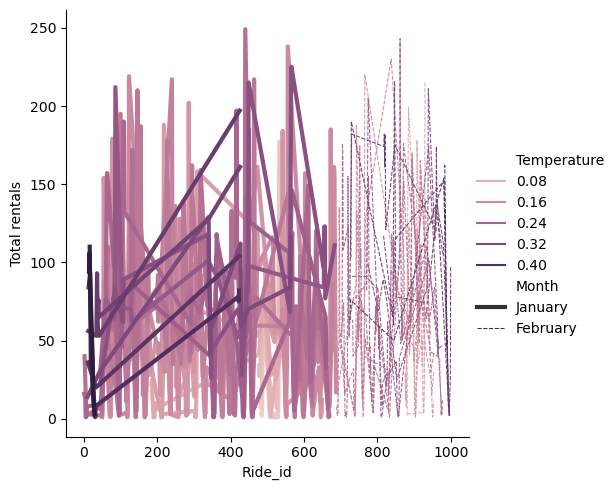

In [1146]:
sns.relplot(kind = 'line', data = merged_df2, x ='Ride_id', y = 'Total rentals',hue = 'Temperature',size='Month', style='Month' )

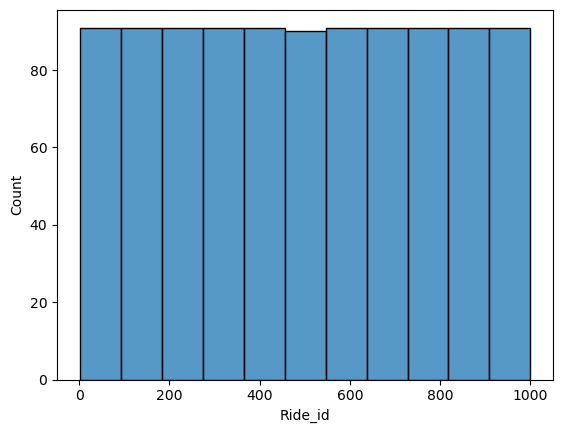

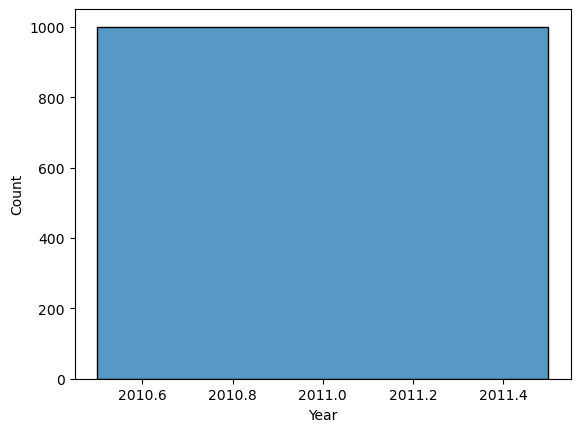

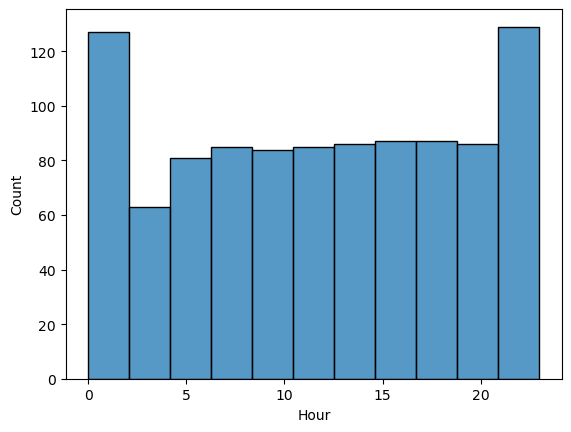

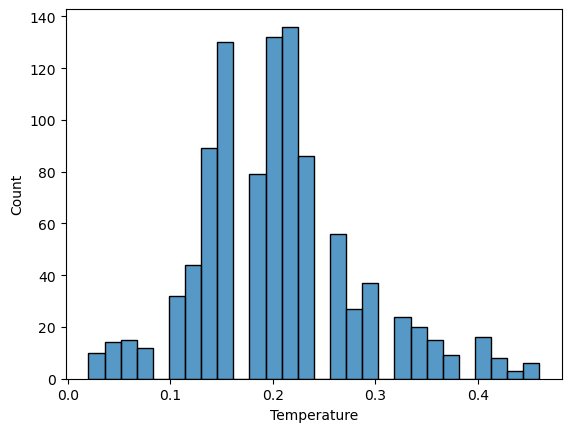

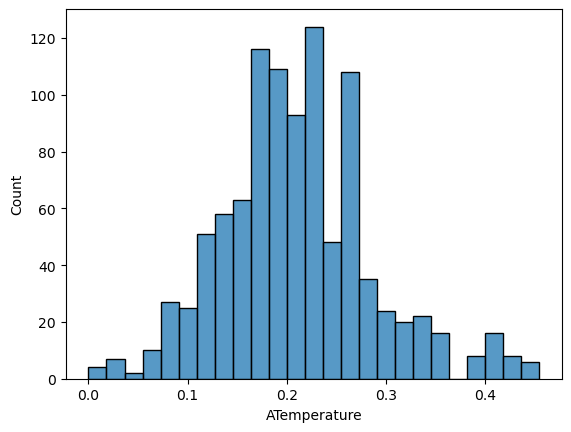

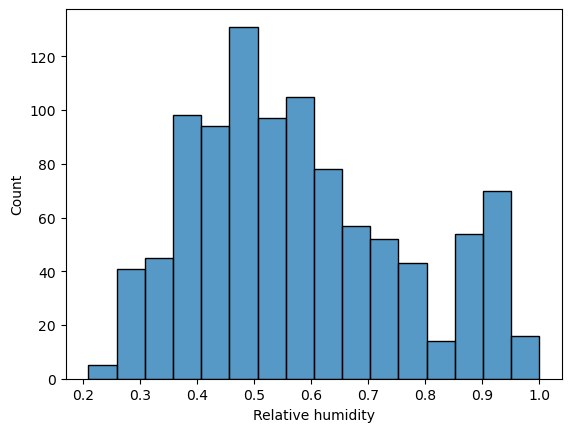

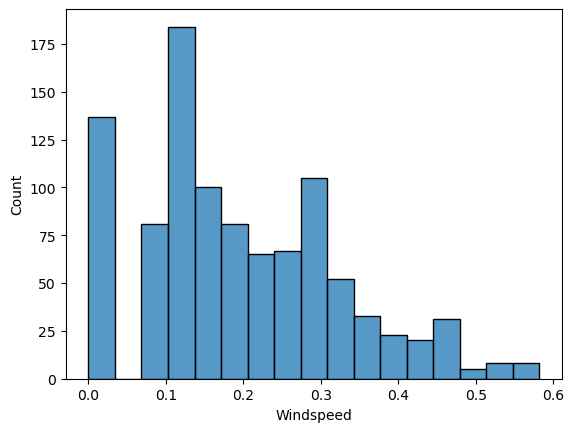

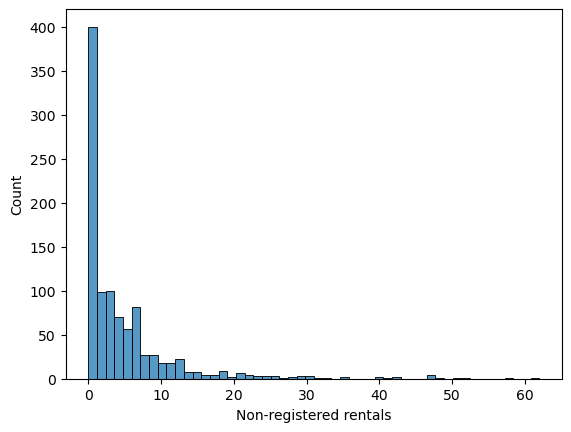

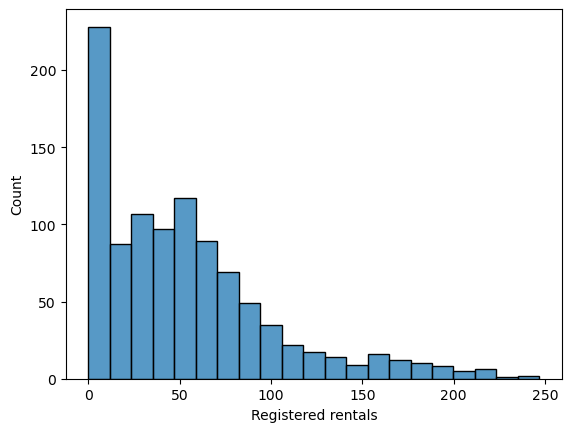

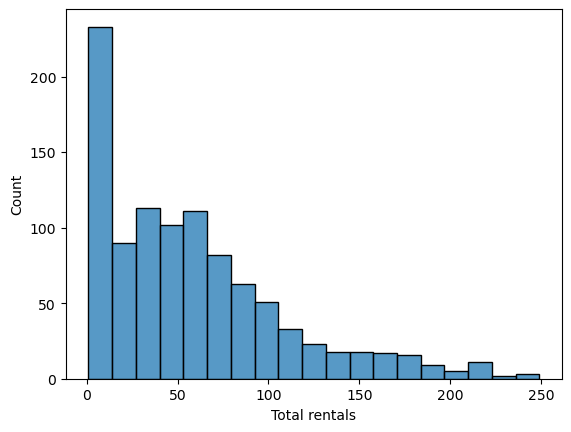

In [1147]:
#Histogram to understand the distribution
for i in merged_df2.select_dtypes(include="number").columns:
    sns.histplot(data=merged_df2,x=i)
    plt.show()

<Axes: xlabel='Total rentals', ylabel='Count'>

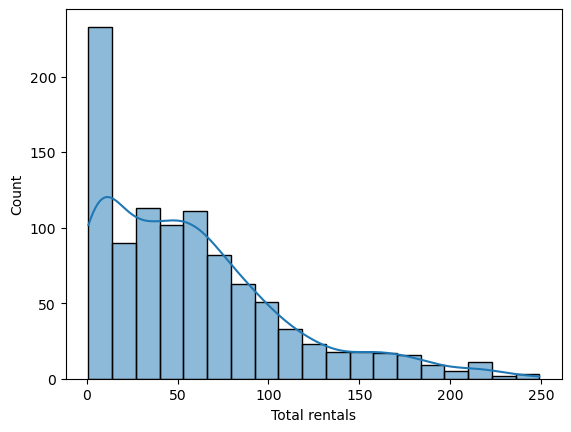

In [1148]:
sns.histplot(data = merged_df2, x = 'Total rentals',kde = True)

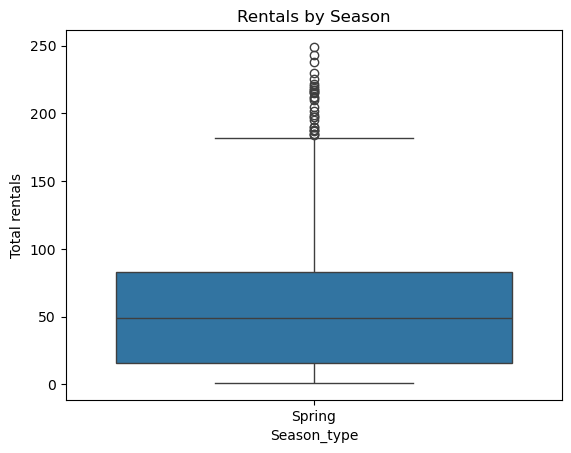

In [1149]:
# Boxplot: Rentals by Season
sns.boxplot(x='Season_type', y='Total rentals', data=merged_df2)
plt.title('Rentals by Season')
plt.show()

In [1150]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
Q1 = merged_df2['Temperature'].quantile(0.25)
Q3 = merged_df2['Temperature'].quantile(0.75)
IQR = Q3 - Q1

In [1151]:
IQR

0.07999999999999999

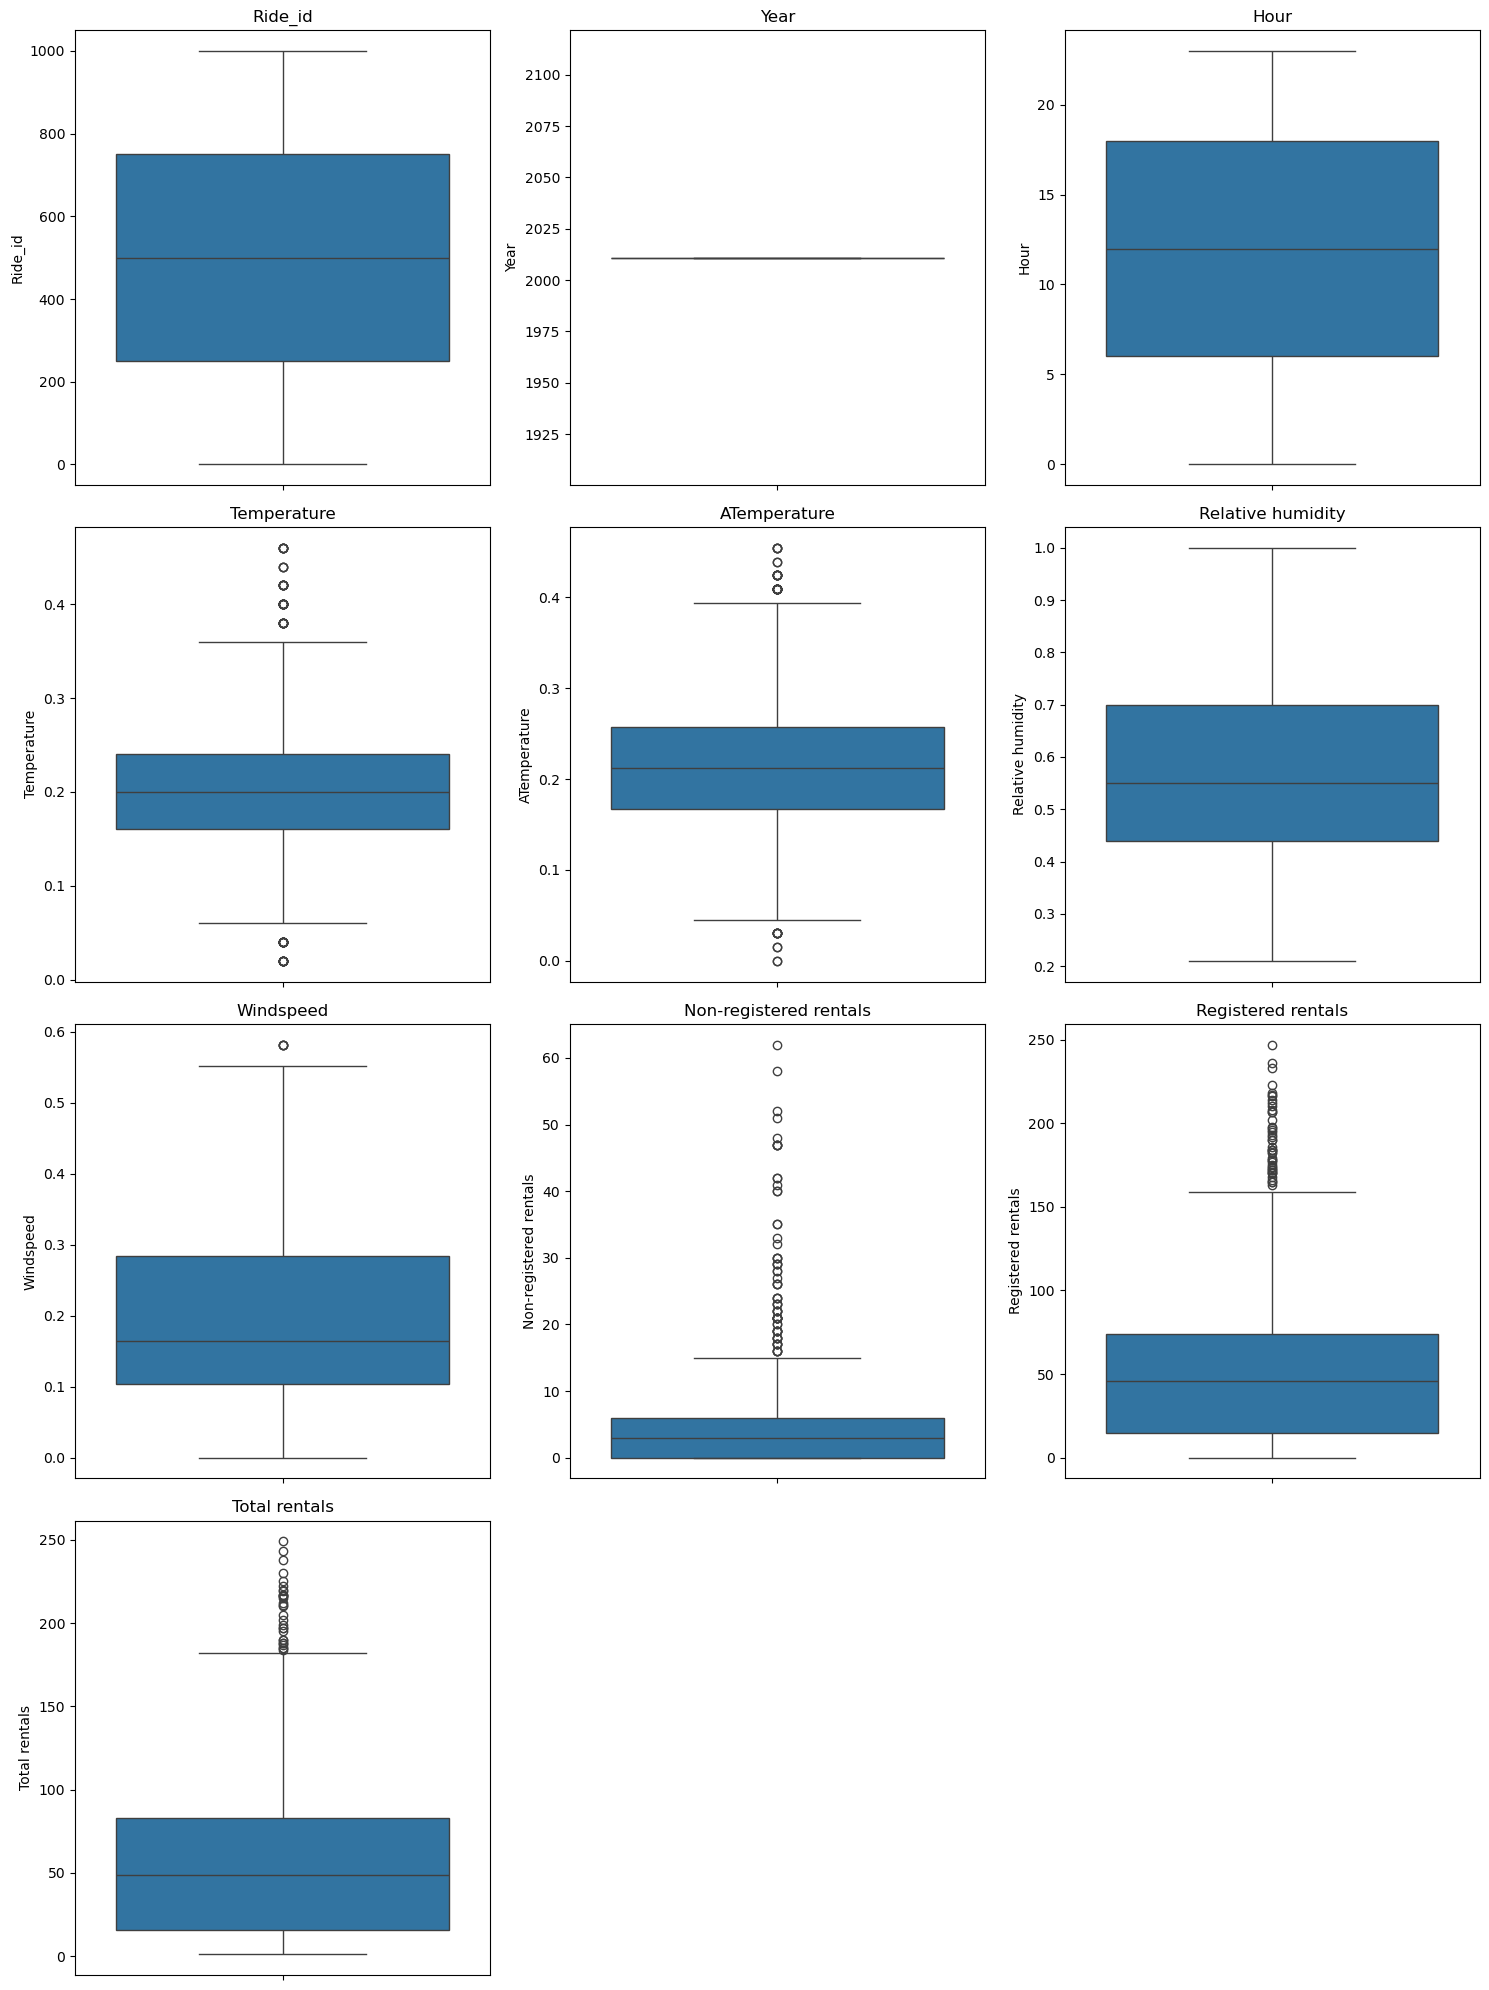

In [1152]:
numerical_cols = merged_df2.select_dtypes(include=['int64','float64']).columns
num_cols = len(numerical_cols)

# Calculate the number of rows and columns for the subplots
ncols = 3
nrows = int(np.ceil(num_cols / ncols))  # Ceiling division to handle any extra columns

plt.figure(figsize=(15, 5 * nrows))  # Adjust figure height based on number of rows

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=merged_df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()


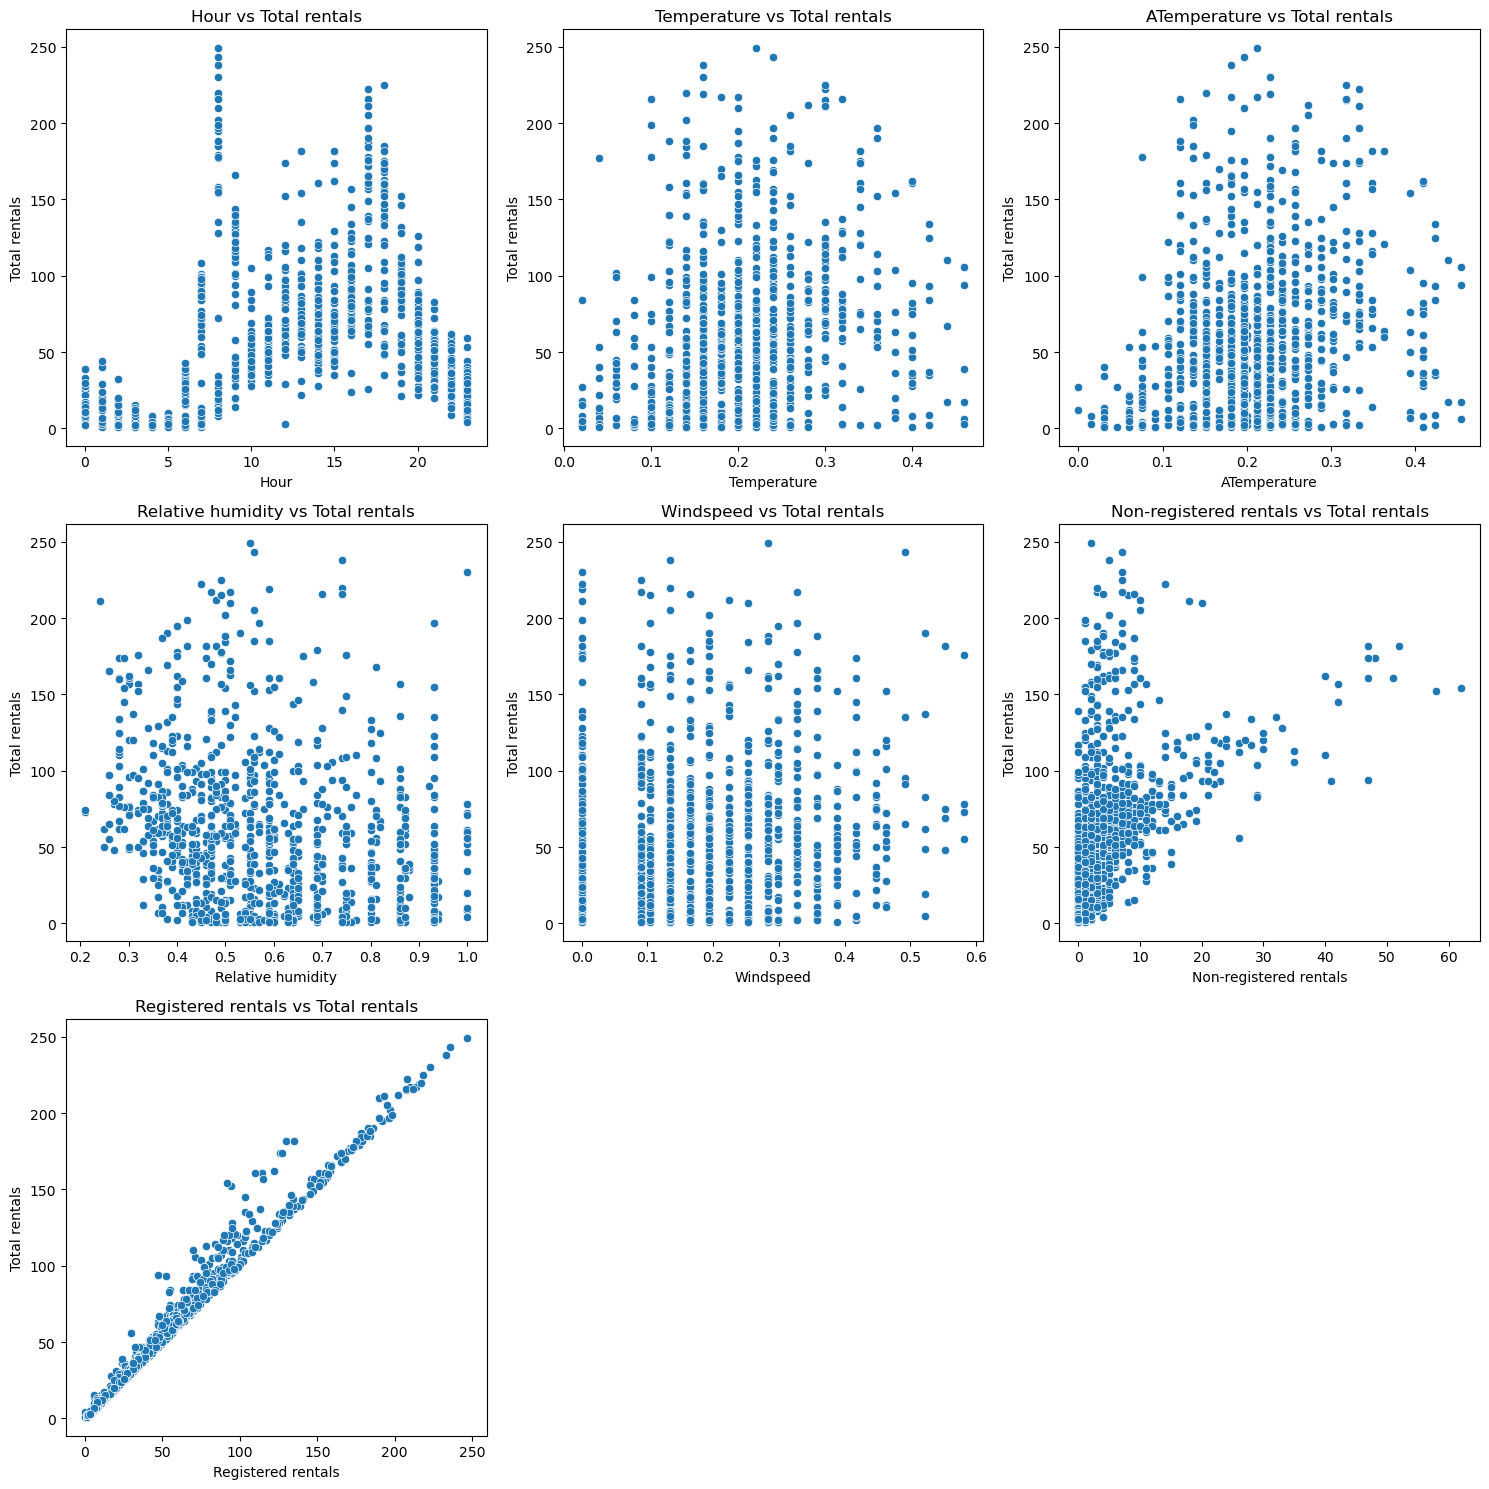

In [1153]:
# List of columns to plot against 'Total rentals'
cols_to_plot = ['Hour', 'Temperature', 'ATemperature', 'Relative humidity', 
                'Windspeed', 'Non-registered rentals', 'Registered rentals']

# Calculate the number of rows and columns for the grid
ncols = 3  # Number of columns in the grid
nrows = int(np.ceil(len(cols_to_plot) / ncols))  # Calculate the number of rows needed

# Create a figure and axes for the grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of axes to make it easier to loop over
axes = axes.flatten()

# Loop over the columns and the axes to create scatter plots
for i, col in enumerate(cols_to_plot):
    sns.scatterplot(data=merged_df2, x=col, y='Total rentals', ax=axes[i])
    axes[i].set_title(f'{col} vs Total rentals')  # Set title for each subplot

# Remove any empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [1154]:
merged_df2.select_dtypes(include="number").columns

Index(['Ride_id', 'Year', 'Hour', 'Temperature', 'ATemperature',
       'Relative humidity', 'Windspeed', 'Non-registered rentals',
       'Registered rentals', 'Total rentals'],
      dtype='object')

In [1155]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=merged_df2.select_dtypes(include="number").corr()

<Axes: >

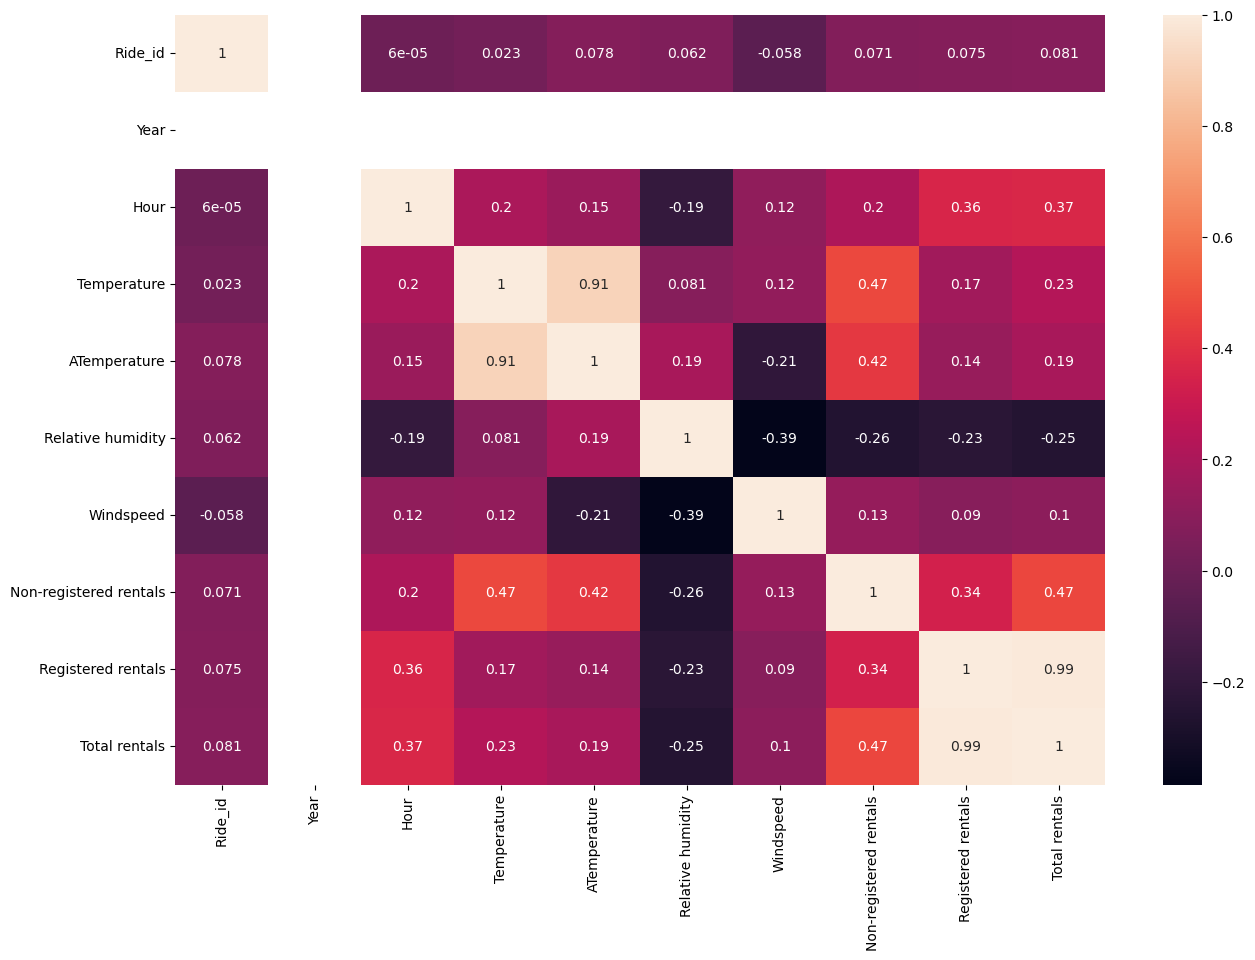

In [1156]:
plt.figure(figsize=(15,10))
sns.heatmap(s,annot=True)

In [1157]:
#Exclude non-numeric columns:
numeric_data=merged_df2.select_dtypes(include=[float,int])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                         Ride_id  Year      Hour  Temperature  ATemperature  \
Ride_id                 1.000000   NaN  0.000060     0.023406      0.077546   
Year                         NaN   NaN       NaN          NaN           NaN   
Hour                    0.000060   NaN  1.000000     0.203512      0.148524   
Temperature             0.023406   NaN  0.203512     1.000000      0.909940   
ATemperature            0.077546   NaN  0.148524     0.909940      1.000000   
Relative humidity       0.062116   NaN -0.194853     0.080720      0.192440   
Windspeed              -0.057837   NaN  0.116640     0.122625     -0.212119   
Non-registered rentals  0.071259   NaN  0.204476     0.470221      0.423553   
Registered rentals      0.074993   NaN  0.357042     0.169045      0.138231   
Total rentals           0.081129   NaN  0.366047     0.229292      0.193349   

                        Relative humidity  Windspeed  Non-registered rentals  \
Ride_id                          0.062116  -0.0578

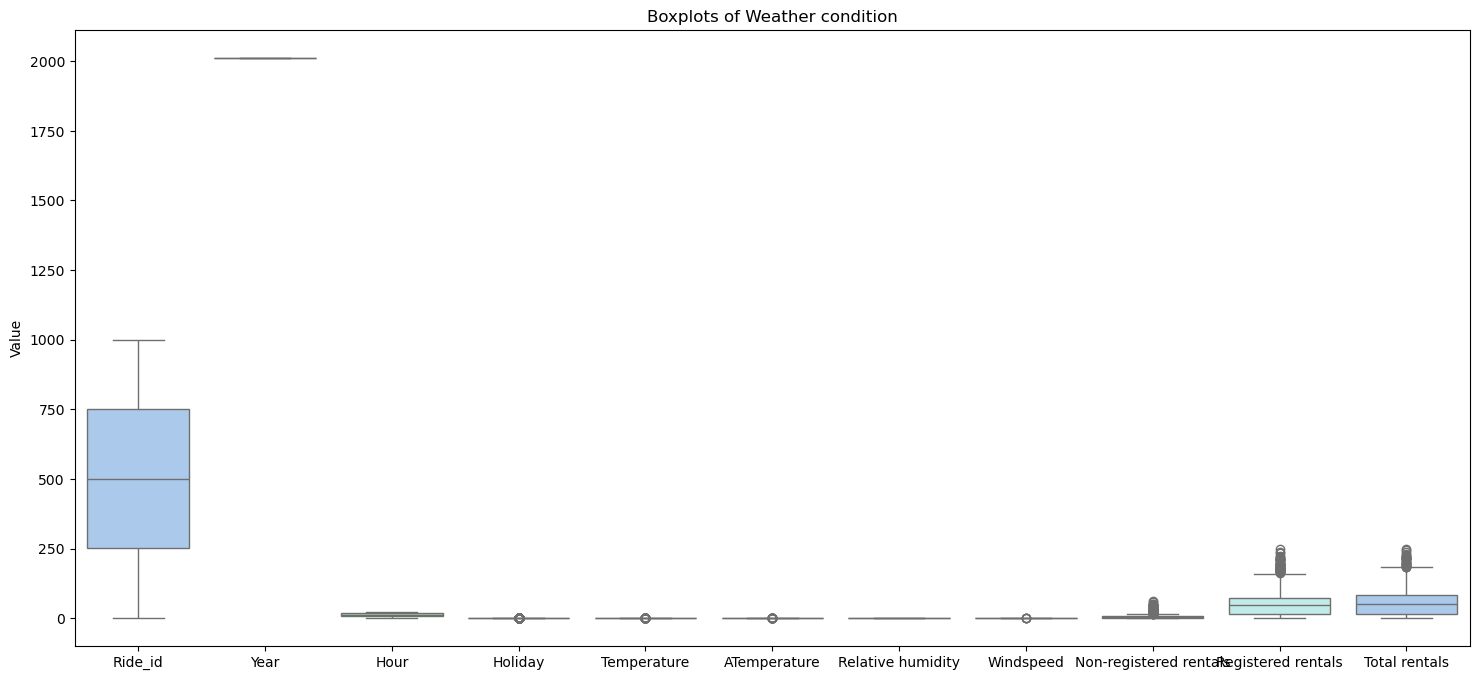

In [1158]:
# After boxplot
plt.figure(figsize=(18,8))
sns.boxplot(data=merged_df2, palette='pastel')
plt.title('Boxplots of Weather condition')
plt.ylabel('Value')
plt.show()

In [1159]:
for i in ['Temperature', 'ATemperature', 'Relative humidity', 'Windspeed']:
    lw,uw=wisker(merged_df2[i])
    merged_df2[i]=np.where(merged_df2[i]<lw,lw,merged_df2[i])
    merged_df2[i]=np.where(merged_df2[i]>uw,uw,merged_df2[i])
    from numpy import log1p

# Log transformation for skewed columns
for col in ['Non-registered rentals', 'Registered rentals', 'Total rentals']:
    skewness = skew(merged_df2[col])
    if abs(skewness) > 1:
        merged_df2[col] = log1p(merged_df2[col])

print(merged_df2.head())

   Ride_id        Date Season_type  Year    Month  Hour  Holiday   Weekday  \
0        1  01-01-2011      Spring  2011  January     0     True  Saturday   
1        2  01-01-2011      Spring  2011  January     1     True  Saturday   
2        3  01-01-2011      Spring  2011  January     2     True  Saturday   
3        4  01-01-2011      Spring  2011  January     3     True  Saturday   
4        5  01-01-2011      Spring  2011  January     4     True  Saturday   

                Weather  Temperature  ATemperature  Relative humidity  \
0  Clear, Partly cloudy        -0.12      -0.09204              -0.18   
1  Clear, Partly cloudy        -0.12      -0.09204              -0.18   
2  Clear, Partly cloudy        -0.12      -0.09204              -0.18   
3  Clear, Partly cloudy        -0.12      -0.09204              -0.18   
4  Clear, Partly cloudy        -0.12      -0.09204              -0.18   

   Windspeed  Non-registered rentals  Registered rentals  Total rentals  
0   -0.15675      

In [1160]:
from scipy.stats import skew

# Analyze skewness for numerical columns
for col in numerical_cols:
    skewness = skew(merged_df2[col])
    print(f"Skewness of {col}: {skewness}")
import warnings
warnings.filterwarnings("ignore")

Skewness of Ride_id: 0.0
Skewness of Year: nan
Skewness of Hour: -0.06342830764812495
Skewness of Temperature: nan
Skewness of ATemperature: nan
Skewness of Relative humidity: nan
Skewness of Windspeed: nan
Skewness of Non-registered rentals: 0.37102159224134496
Skewness of Registered rentals: -0.8179304234376936
Skewness of Total rentals: -0.8270576620743846


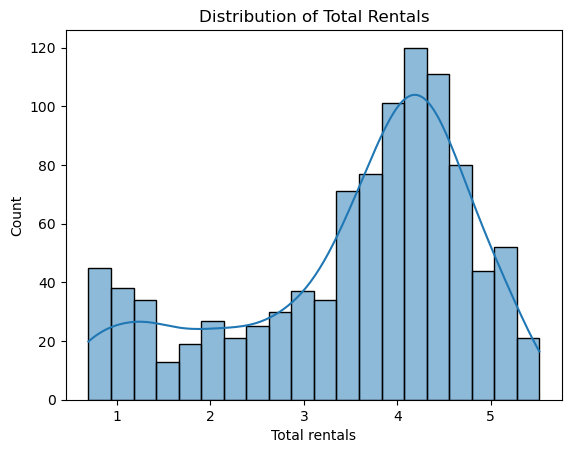

In [1161]:
# Distribution of Rentals
sns.histplot(merged_df2['Total rentals'], bins=20, kde=True)
plt.title('Distribution of Total Rentals')
plt.show()

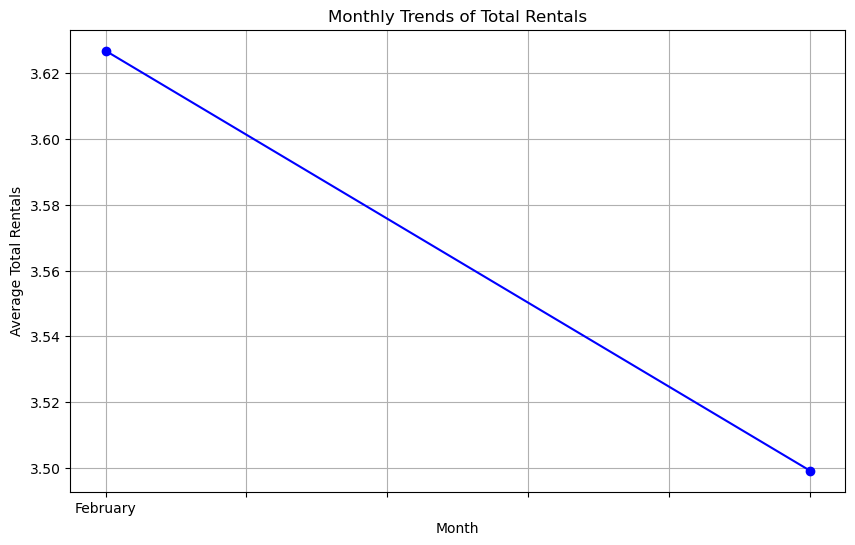

In [1162]:
# Group by month and calculate average rentals
monthly_trends = merged_df2.groupby('Month')['Total rentals'].mean()

# Line Chart for monthly trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(marker='o', color='b')
plt.title("Monthly Trends of Total Rentals")
plt.xlabel("Month")
plt.ylabel("Average Total Rentals")
plt.grid()
plt.show()


### After preprocessing all three datas importing data into CSV file:

In [1164]:
from IPython.display import FileLink

merged_df2.to_csv('final_cleaned_dataset.csv', index=False)
FileLink('final_cleaned_dataset.csv')


C:\Users\Admin\NEXTHIKES PROJECT\final_cleaned_dataset.csv